<a href="https://colab.research.google.com/github/Khalid-Siddiqi/AI-Based-Diabetic-Patient-Management/blob/main/FYP_DEMO_04_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instance Segmentation  for DFU


In [1]:
!nvidia-smi

Mon Nov  4 15:22:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Installing Basic Requirements


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 31.5 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="O5hDeMQaybBKf51Z2CIT")
project = rf.workspace("adpm").project("adpm-image-instance-sementation")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ADPM-Image-Instance-Sementation-1 in yolov11:: 100%|██████████| 5894/5894 [00:01<00:00, 4646.89it/s]


In [6]:
dataset.location


'/content/ADPM-Image-Instance-Sementation-1'

# Training

In [7]:
model = YOLO("yolo11n-seg.pt")

#train model
train_results = model.train(data="/content/ADPM-Image-Instance-Sementation-1/data.yaml",
                            epochs=10,
                            imgsz=640,
                            )

100%|██████████| 5.90M/5.90M [00:00<00:00, 119MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/ADPM-Image-Instance-Sementation-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 308MB/s]


AMP: checks passed ✅


train: Scanning /content/ADPM-Image-Instance-Sementation-1/train/labels... 2772 images, 469 backgrounds, 0 corrupt: 100%|██████████| 2772/2772 [00:01<00:00, 1780.99it/s]


train: New cache created: /content/ADPM-Image-Instance-Sementation-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/ADPM-Image-Instance-Sementation-1/valid/labels... 113 images, 23 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<00:00, 1422.99it/s]

val: New cache created: /content/ADPM-Image-Instance-Sementation-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.09G      1.607      2.896      2.932      1.553          6        640: 100%|██████████| 174/174 [01:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        113        156      0.449      0.462      0.418      0.175      0.421      0.429      0.386      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.04G      1.718      2.935      2.117      1.649          5        640: 100%|██████████| 174/174 [01:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]


                   all        113        156      0.707      0.551      0.575      0.277      0.699      0.545      0.566       0.25

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.04G      1.709      2.842      1.798      1.652          7        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


                   all        113        156       0.46      0.449       0.43      0.185      0.447      0.436      0.422      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.03G      1.654      2.729      1.605      1.615         10        640: 100%|██████████| 174/174 [01:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]


                   all        113        156      0.649      0.593      0.598        0.3      0.642      0.587      0.583      0.267

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.04G       1.58      2.629      1.442      1.532          7        640: 100%|██████████| 174/174 [01:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]


                   all        113        156      0.753      0.603       0.69       0.34      0.745      0.596      0.679      0.314

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.04G       1.47      2.441      1.264      1.462          8        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all        113        156      0.727      0.615      0.693      0.357      0.732      0.615       0.66      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.06G      1.376      2.286      1.123      1.381          7        640: 100%|██████████| 174/174 [01:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


                   all        113        156       0.78      0.731      0.783      0.423      0.753      0.699      0.736       0.39

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.03G      1.312      2.171      1.046      1.342          4        640: 100%|██████████| 174/174 [01:05<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        113        156      0.765      0.712      0.757        0.4      0.742      0.705      0.738      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.04G      1.216      2.018     0.9231      1.273          4        640: 100%|██████████| 174/174 [01:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]


                   all        113        156      0.816      0.744      0.798      0.434      0.801      0.731      0.771      0.409

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.02G      1.151      1.949     0.8528      1.227          6        640: 100%|██████████| 174/174 [01:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        113        156      0.836      0.724      0.789      0.445      0.821      0.712      0.762       0.42



10 epochs completed in 0.198 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


                   all        113        156       0.83      0.724      0.786      0.444      0.815      0.712      0.762      0.419
Speed: 0.3ms preprocess, 6.0ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/segment/train


# Inference


In [9]:
from IPython.display import Image

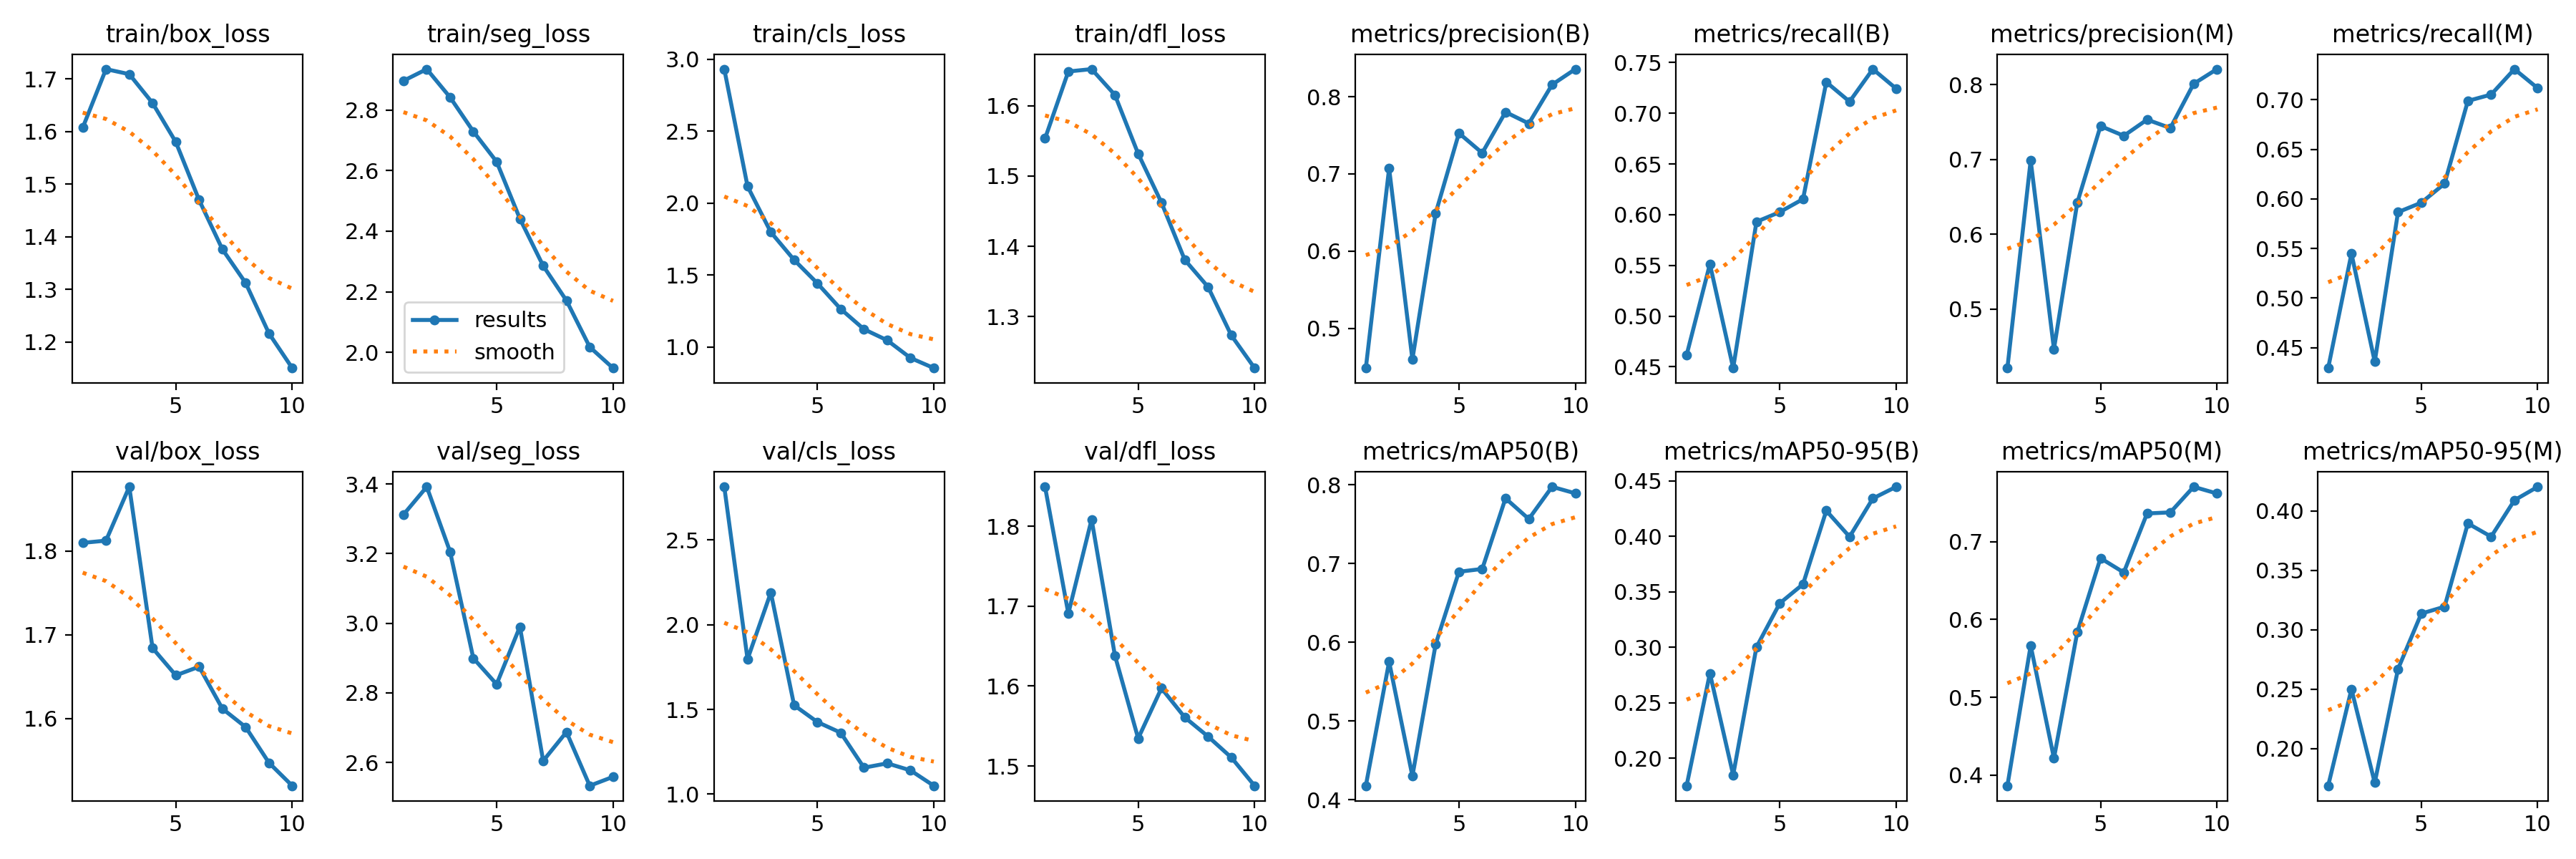

In [13]:
Image("/content/runs/segment/train/results.png", width=600)

# Testing


image 1/1 /content/10.jpg: 640x608 1 ulcer, 218.7ms
Speed: 13.7ms preprocess, 218.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/segment/predict2


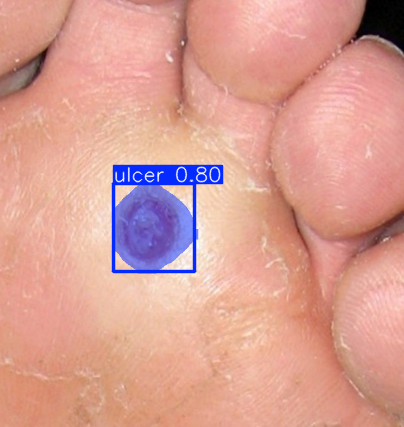

In [15]:
model = YOLO("/content/runs/segment/train/weights/best.pt")
results = model("/content/10.jpg", save=True)
results[0].show()
